### 네이버 영화 리뷰 문장 수집
- 하나의 페이지에서 리뷰 데이터 수집
- 다섯 페이지에서 리뷰 데이터 수집 후 워드클라우드 만들어보기

In [1]:
import requests as req
from bs4 import BeautifulSoup as bs
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'}

In [9]:
url = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=74977&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1'
# html 정보 요청
res = req.get(url, headers = header)
print(res)
# 파이썬 객체 변환
html = bs(res.text, 'lxml')
html

<Response [200]>


<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>네이버 영화</title>
<link href="https://ssl.pstatic.net/static/m/movie/icons/naver_movie_favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/css/common.css?20221208180246" rel="stylesheet" type="text/css"/>
<link href="/css/movie_tablet.css?20221208180246" rel="stylesheet" type="text/css"/>
<link href="/css/movie_end.css?20221208180246" rel="stylesheet" type="text/css"/>
<script src="/js/deploy/movie.all.js?20221208180246" type="text/javascript"></script>
</head>
<body>
<!-- content -->
<input id="movieCode" name="movieCode" type="hidden" value="74977"/>
<input id="onlyActualPointYn" name="onlyActualPointYn" type="hidden" value="N"/>
<input id="includeSpoilerYn" name="includeSpoilerYn" type="hidden" value="N"/>
<input id="order" name="order" type="hidden" value="sympathyScore"/>
<input id="page" name="page" type="hidden" value="1"/>
<div class="ifr_ar

In [55]:
# 선택자로 리뷰 문장 접근하기
# 관람객 단어는 제외하기
# select_one() : 제일 처음 등장하는 해당 태그의 값을 접근 추출 -> 요소 1개
# select() : 해당 태그에 모든 값을 접근 추출 -> 요소 여러개
reple = html.select('p > span:last-child') # list
len(reple)
# 0번째->text
reple[0].text.strip()
reple_txt = []
for i in range(0, len(reple), 1):
    # i 인덱스 번호
    reple_txt.append(reple[i].text.strip())
reple_txt

['제일궁금했던건 2009년도에도 대단했던 CG기술이 2022년도에 얼마나 대단해졌을까..?13년의 기다림이 아깝지 않았습니다.',
 '말이안되네 ㅋㅋㅋ 어케만든겨',
 '미래에도 영화관이 있어야 되는 이유를 보여준 영화.',
 '진짜 올해 최고의 영화네 제임스 카메론 그는 도대체... 첫회차는 그냥 2D로 봤는데 영상미가 뛰어나서 3D로 볼만하겠다.. 3시간이 짧게 느껴진다... 무조건 극장에서 봐야하고 큰 화면에서 봐야한다',
 '찢었다3탄 기다릴고여',
 '믿고보는 아바타 아쿠아리움에 있는줄..3시간이 어떻게 간건지 모르겠어요',
 '카메룬 영감…사랑해…',
 'CG에 돈 많이 썼다는건 개구라임. 다만 직접 판도라가서 수중촬영하긴 빡쎘을거 같음. 나비족 섭외에도 돈 많이 썼겠드만...',
 '영상미 하나로 10점 아맥 3d로 보세요 꼭 이토록 눈이 즐거운 영화는 얼마만인가....',
 '이영화 미쳤다! 13년 기다린 보람이 있습니다!']

### 1~5페이지 리뷰 데이터 수집
 - 단순 출력해보기
 - txt 메모장에 저장 : 파일 다루기
 - 워드클라우드 생성

In [59]:
# 4번째 페이지 접근하는 코드
# url 주소에 페이지 번호 연결하기
# url~~~~false&page=4
url='https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=74977&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'
res = req.get(url, headers = header, params = {'page':3})
print(res.url)

https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=74977&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=3


In [77]:
# 1~5 리뷰 List
reple_lst = []

In [78]:
# 1~5페이지 url 접근
for i in range(1,6,1):
    url='https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=74977&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'
    res = req.get(url, headers = header, params = {'page':i})
    # 파이썬 객체 변환
    html = bs(res.text, 'lxml')
#     print('-' * 30+f'페이지 번호 : {i}' +'-'*30)
    print('-' * 30+f'페이지 번호 : '+ str(i) +'-'*30)
    reple = html.select('p > span:last-child')
    for j in range(0, len(reple), 1):
        print(f'{j+1} ' + reple[j].text.strip())
        reple_lst.append(reple[j].text.strip())

------------------------------페이지 번호 : 1------------------------------
1 제일궁금했던건 2009년도에도 대단했던 CG기술이 2022년도에 얼마나 대단해졌을까..?13년의 기다림이 아깝지 않았습니다.
2 말이안되네 ㅋㅋㅋ 어케만든겨
3 미래에도 영화관이 있어야 되는 이유를 보여준 영화.
4 진짜 올해 최고의 영화네 제임스 카메론 그는 도대체... 첫회차는 그냥 2D로 봤는데 영상미가 뛰어나서 3D로 볼만하겠다.. 3시간이 짧게 느껴진다... 무조건 극장에서 봐야하고 큰 화면에서 봐야한다
5 찢었다3탄 기다릴고여
6 믿고보는 아바타 아쿠아리움에 있는줄..3시간이 어떻게 간건지 모르겠어요
7 CG에 돈 많이 썼다는건 개구라임. 다만 직접 판도라가서 수중촬영하긴 빡쎘을거 같음. 나비족 섭외에도 돈 많이 썼겠드만...
8 카메룬 영감…사랑해…
9 영상미 하나로 10점 아맥 3d로 보세요 꼭 이토록 눈이 즐거운 영화는 얼마만인가....
10 이영화 미쳤다! 13년 기다린 보람이 있습니다!
------------------------------페이지 번호 : 2------------------------------
1 영상미 하나만으로도 충분히 볼 가치가있다
2 알바인지 관종인지 모르겠지만지금 평 다는 애들은 뇌가 비었다는것 만큼은 잘 알겠네요.(조조로 봐도 아직 영화 중반도 안갔음)
3 평점 개판났네..최소 9.5점짜리입니다
4 영화본다고 생각하지말고 외계 아쿠아리움 구경한다고 생각하고 보세요
5 3D 안경 착용하고 3시간 길이의 영화를 보는 건  버겁지만 바닷 속 시각적인 디테일과 환경 보존에 대한 메세지를 잘 전달한 영화.
6 영상미 좋고 3시간이 별로 안지루함 13년기다린 보람이 있음
7 그냥 지나가는 스토리요.영상미 그래픽은 좋은데 아바타 1에 비하면 좀... 아쉽습니다.
8 영화관의 존재 이유를 상기시키는 영화. 영화가 관객에게 주는 가치와 즐거움이 다양할텐데, 아바타2는 영화라는 장르가 가진 고유한 영역

In [79]:
reple_lst

['제일궁금했던건 2009년도에도 대단했던 CG기술이 2022년도에 얼마나 대단해졌을까..?13년의 기다림이 아깝지 않았습니다.',
 '말이안되네 ㅋㅋㅋ 어케만든겨',
 '미래에도 영화관이 있어야 되는 이유를 보여준 영화.',
 '진짜 올해 최고의 영화네 제임스 카메론 그는 도대체... 첫회차는 그냥 2D로 봤는데 영상미가 뛰어나서 3D로 볼만하겠다.. 3시간이 짧게 느껴진다... 무조건 극장에서 봐야하고 큰 화면에서 봐야한다',
 '찢었다3탄 기다릴고여',
 '믿고보는 아바타 아쿠아리움에 있는줄..3시간이 어떻게 간건지 모르겠어요',
 'CG에 돈 많이 썼다는건 개구라임. 다만 직접 판도라가서 수중촬영하긴 빡쎘을거 같음. 나비족 섭외에도 돈 많이 썼겠드만...',
 '카메룬 영감…사랑해…',
 '영상미 하나로 10점 아맥 3d로 보세요 꼭 이토록 눈이 즐거운 영화는 얼마만인가....',
 '이영화 미쳤다! 13년 기다린 보람이 있습니다!',
 '영상미 하나만으로도 충분히 볼 가치가있다',
 '알바인지 관종인지 모르겠지만지금 평 다는 애들은 뇌가 비었다는것 만큼은 잘 알겠네요.(조조로 봐도 아직 영화 중반도 안갔음)',
 '평점 개판났네..최소 9.5점짜리입니다',
 '영화본다고 생각하지말고 외계 아쿠아리움 구경한다고 생각하고 보세요',
 '3D 안경 착용하고 3시간 길이의 영화를 보는 건  버겁지만 바닷 속 시각적인 디테일과 환경 보존에 대한 메세지를 잘 전달한 영화.',
 '영상미 좋고 3시간이 별로 안지루함 13년기다린 보람이 있음',
 '그냥 지나가는 스토리요.영상미 그래픽은 좋은데 아바타 1에 비하면 좀... 아쉽습니다.',
 '영화관의 존재 이유를 상기시키는 영화. 영화가 관객에게 주는 가치와 즐거움이 다양할텐데, 아바타2는 영화라는 장르가 가진 고유한 영역에서 역대 최고라고 할 수 있음',
 '스토리가 새로운 영화는 아닙니다. 하지만 아바타 세계관에 집중할 수 있도록 스토리를 만들었으며 보여지는 장면 하나하나가 너무 알차고 경이롭습니다.   새로운

### 파일 다루기
- 파일 읽기
- 파일 쓰기

In [80]:
# 쓰기 -> write
# f = open('경로 및 파일 명', '모드설정')
f = open('./test.txt', 'w') # 파일 생성
f.write('★캐치마인드 주인공 박인성★') # 메모장에 적을 내용
f.close()

In [95]:
# with open: 자동으로 close()
with open('test1.txt','w') as f:
    f.write('신기하네요.')

In [84]:
# 읽기 -> read
f = open('./test.txt','r')
data = f.readline()
f.close()
print(data)

★캐치마인드 주인공 박인성★


In [94]:
with open('test1.txt','r') as f:
    data = f.readline()
print(data)

신기하네요.


In [97]:
# 1~5페이지 url 접근
# txt파일로 저장

# 텍스트 파일 쓰기 모드로 열기
f = open('./reple.txt', 'w')

for i in range(1,6,1):
    url='https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=74977&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'
    res = req.get(url, headers = header, params = {'page':i})
    
    # 파이썬 객체 변환
    html = bs(res.text, 'lxml')
    
    # 리뷰 문장 접근 [요소, 요소, 요소]
    reple = html.select('p > span:last-child')
    
    for j in range(0, len(reple), 1):
        #f.write 메모장에 계속해서 적기!
        # 파일 생성
        f.write(reple[j].text.strip()) # 메모장에 적을 내용
f.close()

In [99]:
# reple 파일 읽어보기
f = open('./reple.txt','r')
data = f.readline()
f.close()
print(data)

제일궁금했던건 2009년도에도 대단했던 CG기술이 2022년도에 얼마나 대단해졌을까..?13년의 기다림이 아깝지 않았습니다.말이안되네 ㅋㅋㅋ 어케만든겨미래에도 영화관이 있어야 되는 이유를 보여준 영화.진짜 올해 최고의 영화네 제임스 카메론 그는 도대체... 첫회차는 그냥 2D로 봤는데 영상미가 뛰어나서 3D로 볼만하겠다.. 3시간이 짧게 느껴진다... 무조건 극장에서 봐야하고 큰 화면에서 봐야한다찢었다3탄 기다릴고여믿고보는 아바타 아쿠아리움에 있는줄..3시간이 어떻게 간건지 모르겠어요CG에 돈 많이 썼다는건 개구라임. 다만 직접 판도라가서 수중촬영하긴 빡쎘을거 같음. 나비족 섭외에도 돈 많이 썼겠드만...카메룬 영감…사랑해…영상미 하나로 10점 아맥 3d로 보세요 꼭 이토록 눈이 즐거운 영화는 얼마만인가....이영화 미쳤다! 13년 기다린 보람이 있습니다!영상미 하나만으로도 충분히 볼 가치가있다알바인지 관종인지 모르겠지만지금 평 다는 애들은 뇌가 비었다는것 만큼은 잘 알겠네요.(조조로 봐도 아직 영화 중반도 안갔음)평점 개판났네..최소 9.5점짜리입니다영화본다고 생각하지말고 외계 아쿠아리움 구경한다고 생각하고 보세요3D 안경 착용하고 3시간 길이의 영화를 보는 건  버겁지만 바닷 속 시각적인 디테일과 환경 보존에 대한 메세지를 잘 전달한 영화.영상미 좋고 3시간이 별로 안지루함 13년기다린 보람이 있음그냥 지나가는 스토리요.영상미 그래픽은 좋은데 아바타 1에 비하면 좀... 아쉽습니다.영화관의 존재 이유를 상기시키는 영화. 영화가 관객에게 주는 가치와 즐거움이 다양할텐데, 아바타2는 영화라는 장르가 가진 고유한 영역에서 역대 최고라고 할 수 있음스토리가 새로운 영화는 아닙니다. 하지만 아바타 세계관에 집중할 수 있도록 스토리를 만들었으며 보여지는 장면 하나하나가 너무 알차고 경이롭습니다.   새로운 재미보다 아바타 세상에 체험한다는 시점으로 영화를 관람하면...CG미쳤다 바다 물멍 잘하고 갑니다아들이고 아버지며 형제였던 영화. 인생영화.가상의 세계를 완벽하게 

### 워드클라우드 그리기
- 준비해야할 사항 2가지 : matplotlib, wordcloud

In [100]:
!pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 4.5 MB/s eta 0:00:00


In [102]:
# 임폴트
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [103]:
# 텍스트데이터(data) -> 단어로 분류 -> 워드클라우드 그리기
# WordCloud(스타일옵션) : 워드 클라우드의 스타일을 지정
# generate(텍스트데이터) : 단어로 분류 후 워드 클라우드 생성

# wc = WordCloud(폰트설정,
#               배경색,
#               글씨색상)

wc = WordCloud(font_path = "C:/Windows/Fonts/malgunbd.ttf",
               background_color = 'white',
               colormap = 'Dark2').generate(data)
# 빈도수가 높은 단어를 제일 크게 표현

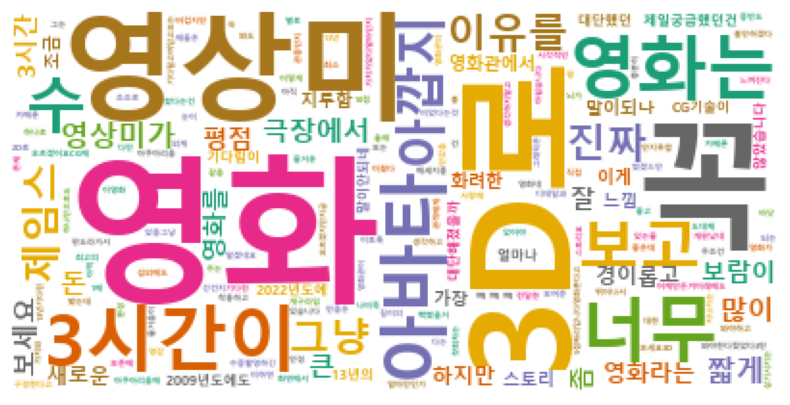

In [109]:
# 그리기
# plt.figure(figsize = (x,y))
plt.figure(figsize = (12,5))
plt.axis('off')
plt.imshow(wc)
# plt.savefig('경로및파일')
plt.savefig('./아바타리뷰.png')